# **Project 5: Build a Data Graph Explorer**

For this challenge, you need to create a data graph explorer using Python that takes input and does the following:

* Get a .csv file in three ways:  
 -- uploading it from the local computer  
 -- getting a url from user input  
 -- putting the url in the code
* Use the Pandas library to save the .csv as a dataframe
* Print headings and the first two rows
* Store the column names as a list
* Choose one or two columns and convert the data to Numpy arrays
* Display data as a scatter plot or a line graph
* Be able to do this for different column combinations, and interpret the graphs
  
Once you're done, submit the URL to the public Colab notebook on your Google drive.
_______________________________________________________________________

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Get the CSV file of your choice - in three different ways**

**A NOTE IN ADVANCE:**  
The csv file chosen for this project has been obtained from a website that provides a wealth of useful materials for computer science and especially machine learning exercises (s. https://www.kaggle.com). It has been published/uploaded there under the title ***Cancer Prediction Dataset*** by Rabie El Kharoua in 2024 (DOI: *10.34740/kaggle/dsv/8651738*, license: CC BY 4.0). As the title suggests, the file holds (empirical) data of a sample of persons with and without cancer that are said to allow to build a model to estimate for every patient the probability of developing cancer, based on the most relevant risk factors.  
To quote from the author's description on the website:  
> "*This dataset contains medical and lifestyle information for 1500 patients, designed to predict the presence of cancer based on various features. The dataset is structured to provide a realistic challenge for predictive modeling in the medical domain.*"  
(s. https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset)  

There are nine features recorded in the dataset:  
* Age *(values between 20 and 80 years)*
* Gender *(0 = female vs. 1 = male)*
* Body Mass Index *(BMI, values between 15 and 40)*
* Smoking *(0 = non-smoker vs. 1 = smoker)*
* Genetic Risk *(0 = low risk level, 1 = medium risk level, 2 = high risk level for cancer)*
* Physical Activity *(values between 0 and 10, representing the number of hours per week spent on physical activities)*
* Alcohol Intake *(values between 0 to 5, representing the number of alcohol units consumed per week)*
* Cancer History *(0 = no vs. 1 = yes)*
* Diagnosis *(0 = no cancer vs. 1 = cancer)*  

Given that the publication - obviously intended for an audience of data science students rather than cancer researchers - does not provide any further information on the origin and the creation of the dataset, a qualitative assessment or classification of these data is not possible. None of the following graphical representations can therefore claim to provide a scientifically accurate interpretation of the cancer risk factors at issue.  
It should also at least be mentioned that not all the features are evenly distributed across the sample. To name just a few points: While the distribution of gender is nearly equal (736 males vs. 764 females), the smokers (404) are clearly outnumbered by non-smokers (1096) in the sample, there are significantly more persons with a low level (1 or 2) than with a high level (4 or 5) of alcohol consumption (616 vs. 272), people diagnosed with cancer make up just over a third (557 persons ~ 37%), and individual age groups might be slightly under- or overrepresented (e.g. persons around the age of 45 or 80 years compared to those around the age of 30, of 40, or of 60 years - as could easily be shown with the help of a histogram).


## (a) upload the file from your local computer

In [ ]:
uploaded = files.upload()
file_name = next(iter(uploaded))
table_1 = pd.read_csv(io.BytesIO(uploaded[file_name]))

table_1

Saving The_Cancer_data_1500_V2.csv to The_Cancer_data_1500_V2.csv


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


## (b) get a URL of the file via user input

In [ ]:
try:
    user_file = input("- please enter the path of your CSV file: ")
    table_2 = pd.read_csv(user_file)
except FileNotFoundError:
    print("# ERROR! No such file or directory found!")

table_2

- please enter the path of your CSV file: /content/drive/My Drive/Colab Notebooks/The_Cancer_data_1500_V2.csv


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


## (c) insert a URL of the file into your code

In [ ]:
url = "https://raw.githubusercontent.com/W-Seiffert/fcc_projects/main/CollegeAlgebraPython/The_Cancer_data_1500_V2.csv"
table_3 = pd.read_csv(url)
table_3


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


## **Save the csv file as a `pandas` dataframe - and then explore / work with your dataset**

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/The_Cancer_data_1500_V2.csv")
df.head(2)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0


In [ ]:
columns = list(df.columns)
columns

['Age',
 'Gender',
 'BMI',
 'Smoking',
 'GeneticRisk',
 'PhysicalActivity',
 'AlcoholIntake',
 'CancerHistory',
 'Diagnosis']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


### get descriptive statistics about the dataset


In [ ]:
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


### create a correlation table

In [ ]:
df.corr()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
Age,1.000000,0.007145,0.030246,-0.013914,-0.027025,0.016396,0.003209,-0.010996,0.196603
Gender,0.007145,1.000000,-0.012516,0.035384,-0.004674,0.023401,0.009723,0.007657,0.250336
BMI,0.030246,-0.012516,1.000000,-0.012616,0.011392,0.011480,0.004711,-0.010824,0.187560
Smoking,-0.013914,0.035384,-0.012616,1.000000,-0.021039,-0.043817,-0.001660,0.016368,0.226999
GeneticRisk,-0.027025,-0.004674,0.011392,-0.021039,1.000000,-0.039721,-0.016864,-0.010833,0.253472
PhysicalActivity,0.016396,0.023401,0.011480,-0.043817,-0.039721,1.000000,0.033856,0.018136,-0.150089
AlcoholIntake,0.003209,0.009723,0.004711,-0.001660,-0.016864,0.033856,1.000000,0.055403,0.212772
CancerHistory,-0.010996,0.007657,-0.010824,0.016368,-0.010833,0.018136,0.055403,1.000000,0.392188
Diagnosis,0.196603,0.250336,0.187560,0.226999,0.253472,-0.150089,0.212772,0.392188,1.000000


### create a correlation heatmap (making use of the **`Seaborn`** library)
(`Seaborn` is a special Python library based on `Matplotlib` and designed for the purposes of "statistical data visualization")

<Axes: >

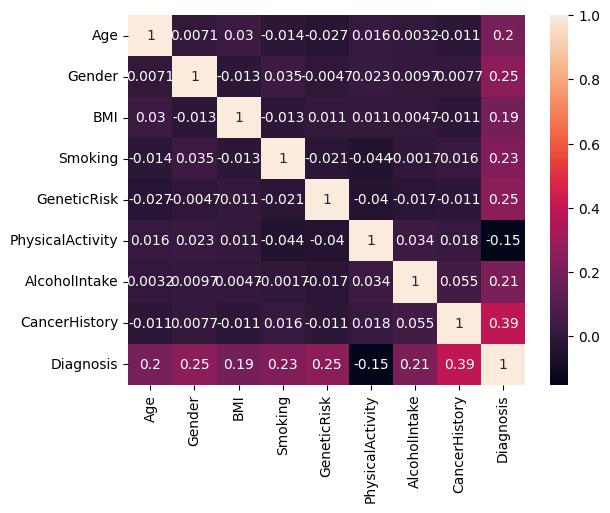

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), annot = True)

### provide a graphical representation of selected data relationships

**(1)**

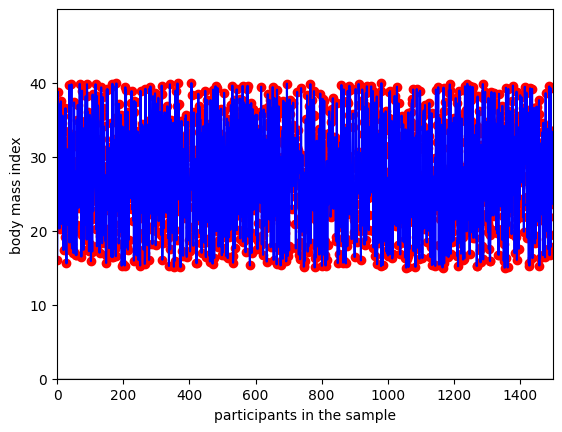

In [ ]:
# select the columns to be mapped on the x- and the y-axis of your coordinate system
# and convert their values to numpy arrays
x = df.index.to_numpy()
y = df["BMI"].to_numpy()

# set the dimensions of the window to be displayed
xmin = x.min() - 1
xmax = x.max() + 1
ymin = 0               # y.min() - 1
ymax = y.max() + 10    # y.max() + 1

# plot the graph (using Matplotlib)
fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax]) # window size
plt.plot([xmin,xmax],[0,0],'lightgrey') # grey x axis
plt.plot([0,0],[ymin,ymax],'lightgrey') # grey y axis
plt.plot(x,y,"ro") # scatterplot
plt.plot(x,y,"b")  # line graph
ax.set_xlabel("participants in the sample")
ax.set_ylabel("body mass index")
plt.show()


**... a short comment on this graph:**  
What you see here is a combination of a scatterplot (*red*) and a line graph (*blue*), both visualising the distribution of recorded **BMI values** across the sample (1500). With a mean value of 27.51 (--> "overweight"!), there is obviously a significant percentage of persons in the sample being "underweight" (BMI < 18.5 --> 222 persons) or suffering from severe "obesity" (BMI >= 35, sometimes referred to as "class II obesity" --> 294 persons).  
The strikingly high proportion of overweight and obese people, according to the current BMI scale, seems to be typical for most of the wealthier countries especially of the Western world, where - among other factors - the availability or even an oversupply of food, especially high calorie and energy-dense food that is widely affordable, is more or less guaranteed (a situation that has led to a marked increase in food portion sizes!), and where the development of automobility, public/urban transportation and, more recently, all sorts of delivery services as well as an unprecedented increase of service or office jobs, that don't require a significant amount of physical activity, have favoured a (largely) inactive, "sedentary lifestyle".  
In contrast, the high proportion of underweight persons in the sample (14.8%!) is rather surprising and calls actually for an explanation, for which, however, further background information on the dataset would be needed.

**(2)**

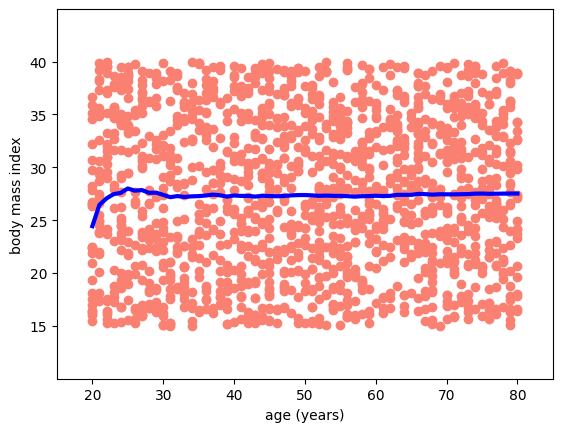

In [ ]:
# select the columns to be mapped on the x- and the y-axis of your coordinate system
# and convert their values to numpy arrays
x = df["Age"].to_numpy()
y = df["BMI"].to_numpy()

# set the dimensions of the window to be displayed
xmin = x.min() - 5
xmax = x.max() + 5
ymin = y.min() - 5
ymax = y.max() + 5

# calculate BMI mean values for every age group, to be plotted in a line graph
bmi_means = list()
age_steps = list()
limit = df["Age"].max()
age = 20
while age <= limit:
    bmi_mean = df[df["Age"] <= age]["BMI"].mean()
    age_steps.append(age)
    bmi_means.append(bmi_mean)
    age += 1
line_x = np.array(age_steps)
line_y = np.array(bmi_means)

# plot the graph (using Matplotlib)
fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax])                 # window size
plt.plot(x, y, "o", color="salmon")             # scatterplot
plt.plot(line_x, line_y, "blue", linewidth=3)   # line graph
ax.set_xlabel("age (years)")
ax.set_ylabel("body mass index")
plt.show()

**... a short comment on this graph:**  
Now we have a scatterplot (*red*) and a line graph (*blue*) which represent the **BMI** value distribution depending on **age**. The line graph does not show all the BMI values in this case, but only mean values for every age value, that is: every group of peers in the sample.  
As to be expected according to surveys on the subject, we find a similarly broad spread of values across all age groups here, with only a slight gender difference and a decent increase for older adults. This seems to be a typical finding for the US population (cf. https://en.wikipedia.org/wiki/Obesity_in_the_United_States and the surveys/data cited there), whereas in Europe - to give just one example for comparison - the differences between the sexes (--> higher rates of overweight and (pre-)obesity among men) and the age groups (--> higher rates of overweight and (pre-)obesity among the elderly) are overall more pronounced (cf. https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Overweight_and_obesity_-_BMI_statistics). However, this observation must not be overestimated (and should be specified in more detail), as there are major differences between the individual racial groups in the USA.  
(There is a slight peak here for people around the age of 25 with a mean value of 27.99, but since this value is also between 27.3 and 27.6 everywhere else - except only for the twenty-year olds -, we are probably justified in seeing this as a negligible random phenomenon of our sample.)

**(3)**

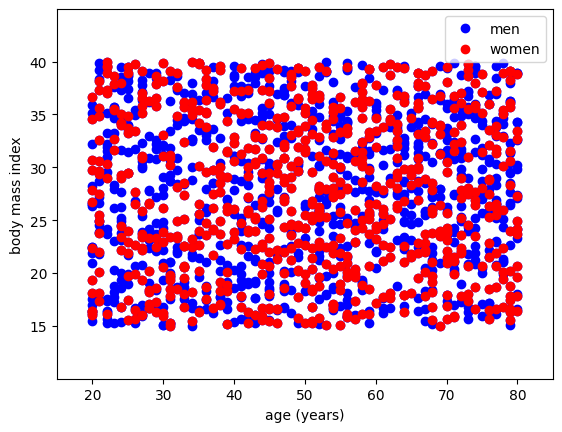

In [ ]:
# select the columns to be mapped on the x- and the y-axis of your coordinate system
# and convert their values to numpy arrays
df_m = df[df["Gender"] == 0]
df_w = df[df["Gender"] == 1]
x_1 = df["Age"].to_numpy()
y_1 = df["BMI"].to_numpy()
x_2 = df_w["Age"].to_numpy()
y_2 = df_w["BMI"].to_numpy()

# set the dimensions of the window to be displayed
xmin = min(x_1.min(), x_2.min()) - 5
xmax = max(x_1.max(), x_2.max()) + 5
ymin = min(y_1.min(), y_2.min()) - 5
ymax = max(y_1.max(), y_2.max()) + 5

# plot the graph (using Matplotlib)
fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax])
plt.plot(x_1, y_1, "bo", label="men")       # scatterplot: men (blue)
plt.plot(x_2, y_2, "ro", label="women")     # scatterplot: women (red)
ax.set_xlabel("age (years)")
ax.set_ylabel("body mass index")
plt.legend(loc="upper right")
plt.show()

**... a short comment on this graph:**  
These two scatterplots represent the - only slightly differing - distributions of the **BMI** values of male (*blue*) and female persons (*red*) in the sample, depending on **age**.  
If we recalculate some mean values, we can see that almost 21% of the women are among the persons to be classified as (severely) obese (BMI >= 35), while the proportion of men is "only" 18.3%. In the group of people with a BMI between 25 and 35, on the other hand, the male participants are more strongly represented (with a proportion of 43%, compared to 38% of the females). Without going into further detail here, we conclude this comment by another noteworthy observation: Among those under 25 years, women have an average BMI value of 29, men "only" of 26.5.

In [ ]:
# calculation of BMI mean values and overweight/obesity proportions
# for subsamples defined by gender and age

females = df[df["Gender"] == 1]
males = df[df["Gender"] == 0]
females_under25 = females[females["Age"] < 25]
males_under25 = males[males["Age"] < 25]
females_under30 = females[females["Age"] <= 30]
males_under30 = males[males["Age"] <= 30]
females_under50 = females[females["Age"] <= 50]
males_under50 = males[males["Age"] <= 50]
females_50to80 = females[females["Age"] > 50]
males_50to80 = males[males["Age"] > 50]
females_70to80 = females[females["Age"] > 70]
males_70to80 = males[males["Age"] > 70]

print("BMI MEAN VALUES:")
print("females of age < 25 years:", females_under25["BMI"].mean())
print("males of age < 25 years:", males_under25["BMI"].mean())
print("females of age <= 30 years:", females_under30["BMI"].mean())
print("males of age <= 30 years:", males_under30["BMI"].mean())
print("females of age <= 50 years:", females_under50["BMI"].mean())
print("males of age <= 50 years:", males_under50["BMI"].mean())
print("females of age > 50 years:", females_50to80["BMI"].mean())
print("males of age > 50 years:", males_50to80["BMI"].mean())
print("females of age > 70 years:", females_70to80["BMI"].mean())
print("males of age > 70 years:", males_70to80["BMI"].mean())
print()

print("OVERWEIGHT / OBESITY:")
females_obese = females[females["BMI"] >= 35]
males_obese = males[males["BMI"] >= 35]
print("females, obese:", females_obese["Diagnosis"].count() / females["Diagnosis"].count(), "%")
print("males, obese:", males_obese["Diagnosis"].count() / males["Diagnosis"].count(), "%")
females_BMI25to35 = females[(females["BMI"] >= 25) & (females["BMI"] < 35)]
males_BMI25to35 = males[(males["BMI"] >= 25) & (males["BMI"] < 35)]
print("females, BMI 25-35:", females_BMI25to35["Diagnosis"].count() / females["Diagnosis"].count(), "%")
print("males, BMI 25-35:", males_BMI25to35["Diagnosis"].count() / males["Diagnosis"].count(), "%")

BMI MEAN VALUES:
females of age < 25 years: 29.060678904186947
males of age < 25 years: 26.513816342159917
females of age <= 30 years: 27.677549798851945
males of age <= 30 years: 27.160165298528657
females of age <= 50 years: 27.601964911618392
males of age <= 50 years: 27.15664426749733
females of age > 50 years: 27.245195196707186
males of age > 50 years: 28.042932462590738
females of age > 70 years: 27.112139306701405
males of age > 70 years: 28.47093418792347

OVERWEIGHT / OBESITY:
females, obese: 0.20923913043478262 %
males, obese: 0.18324607329842932 %
females, BMI 25-35: 0.3804347826086957 %
males, BMI 25-35: 0.43455497382198954 %


**(4)**

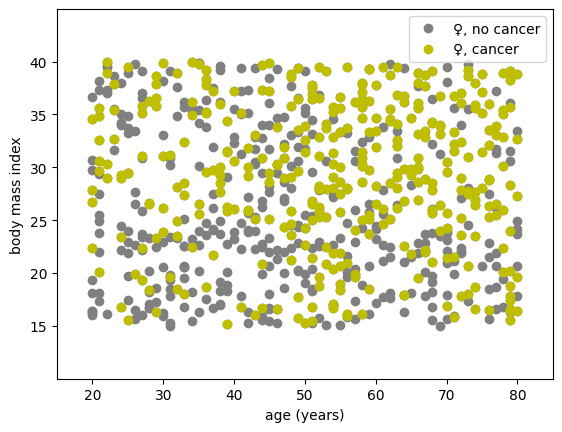

In [ ]:
# select the columns to be mapped on the x- and the y-axis of your coordinate system
# and convert their values to numpy arrays
df_w = df[df["Gender"] == 1]
df_wcanc = df_w[df_w["Diagnosis"] == 1]
x_1 = df_w["Age"].to_numpy()
y_1 = df_w["BMI"].to_numpy()
x_2 = df_wcanc["Age"].to_numpy()
y_2 = df_wcanc["BMI"].to_numpy()

# set the dimensions of the window to be displayed
xmin = min(x_1.min(), x_2.min()) - 5
xmax = max(x_1.max(), x_2.max()) + 5
ymin = min(y_1.min(), y_2.min()) - 5
ymax = max(y_1.max(), y_2.max()) + 5

# plot the graph (using Matplotlib)
fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax])
plt.plot(x_1, y_1, "o", color="grey", label="\u2640, no cancer")  # scatterplot: women without cancer diagnosis
plt.plot(x_2, y_2, "yo", label="\u2640, cancer")                  # scatterplot: women with cancer diagnosis
ax.set_xlabel("age (years)")
ax.set_ylabel("body mass index")
plt.legend(loc="upper right")
plt.show()

**... a short comment on this graph:**  
These are two more scatterplots which refer to all women of the sample and suggest a **correlation between high BMI values, increasing age and a diagnosis of cancer**.  
On the whole, 49.5% of the women in the sample have a diagnosis of cancer (>< compared to only 25.3% of men!).  
If we first consider the variables *age* and *body mass index* separately, we can specify this observation by stating (1) that only 36.7% of women under 50 years of age, but nearly 61% of those over 50 years have a cancer diagnosis; and (2) that among the cancer patients there are only 31.5% of women with a BMI value under 25, but 62.9% of those with a BMI value between 25 and 35 and 60.4% of those with a BMI value over 35.  
If we look at the variables in relation to each other, we see that among women under the age of 50 only 21.9% of those with a BMI value under 25, but 48.8% of those with a BMI value between 25 and 35 and 45% of those with a BMI value over 35 are diagnosed with cancer; among women over the age of 50, the percentages are 40.4% for those with a BMI value under 25, 73.9% for those with a BMI value between 25 and 35, and 77% for those with a BMI value over 35.  
Thus, we are dealing with two serious factors here which, in combination, significantly increase the risk of developing cancer.

In [ ]:
# calculation of relevant mean values

females = df[df["Gender"] == 1]
females_canc = females[females["Diagnosis"] == 1]
females_BMIsub25 = females[females["BMI"] < 25]
females_BMI25to34 = females[(females["BMI"] >= 25) & (females["BMI"] < 35)]
females_BMIsup35 = females[females["BMI"] >= 35]
females_canc_BMIsub25 = females_canc[females_canc["BMI"] < 25]
females_canc_BMI25to34 = females_canc[(females_canc["BMI"] >= 25) & (females_canc["BMI"] < 35)]
females_canc_BMIsup35 = females_canc[females_canc["BMI"] >= 35]

print("Females total:", females["Diagnosis"].count(), "--", "Females with cancer:", females_canc["Diagnosis"].count(), "-- that is:", females_canc["Diagnosis"].count() / females["Diagnosis"].count(), "%")
print("Females with cancer, BMI < 25:", females_canc_BMIsub25["Diagnosis"].count() / females_BMIsub25["Diagnosis"].count(), "%")
print("Females with cancer, 25 <= BMI < 35:", females_canc_BMI25to34["Diagnosis"].count() / females_BMI25to34["Diagnosis"].count(), "%")
print("Females with cancer, BMI >= 35:", females_canc_BMIsup35["Diagnosis"].count() / females_BMIsup35["Diagnosis"].count(), "%")

females_under50 = females[females["Age"] < 50]
females_over50 = females[females["Age"] >= 50]
females_canc_under50 = females_canc[females_canc["Age"] < 50]
females_canc_over50 = females_canc[females_canc["Age"] >= 50]
print("Females with cancer, under 50 years:", females_canc_under50["Diagnosis"].count() / females_under50["Diagnosis"].count(), "%")
print("Females with cancer, over 50 years:", females_canc_over50["Diagnosis"].count() / females_over50["Diagnosis"].count(), "%")

females_under50_BMIsub25 = females_BMIsub25[females_BMIsub25["Age"] < 50]
females_canc_under50_BMIsub25 = females_canc_BMIsub25[females_canc_BMIsub25["Age"] < 50]
print("Females with cancer, under 50 years, BMI < 25:", females_canc_under50_BMIsub25["Diagnosis"].count() / females_under50_BMIsub25["Diagnosis"].count(), "%")
females_over50_BMIsub25 = females_BMIsub25[females_BMIsub25["Age"] >= 50]
females_canc_over50_BMIsub25 = females_canc_BMIsub25[females_canc_BMIsub25["Age"] >= 50]
print("Females with cancer, over 50 years, BMI < 25:", females_canc_over50_BMIsub25["Diagnosis"].count() / females_over50_BMIsub25["Diagnosis"].count(), "%")

females_under50_BMI25to34 = females_BMI25to34[females_BMI25to34["Age"] < 50]
females_canc_under50_BMI25to34 = females_canc_BMI25to34[females_canc_BMI25to34["Age"] < 50]
print("Females with cancer, under 50 years, 25 <= BMI < 35:", females_canc_under50_BMI25to34["Diagnosis"].count() / females_under50_BMI25to34["Diagnosis"].count(), "%")
females_over50_BMI25to34 = females_BMI25to34[females_BMI25to34["Age"] >= 50]
females_canc_over50_BMI25to34 = females_canc_BMI25to34[females_canc_BMI25to34["Age"] >= 50]
print("Females with cancer, over 50 years, 25 <= BMI < 35:", females_canc_over50_BMI25to34["Diagnosis"].count() / females_over50_BMI25to34["Diagnosis"].count(), "%")

females_under50_BMIsup35 = females_BMIsup35[females_BMIsup35["Age"] < 50]
females_canc_under50_BMIsup35 = females_canc_BMIsup35[females_canc_BMIsup35["Age"] < 50]
print("Females with cancer, under 50 years, BMI >= 35:", females_canc_under50_BMIsup35["Diagnosis"].count() / females_under50_BMIsup35["Diagnosis"].count(), "%")
females_over50_BMIsup35 = females_BMIsup35[females_BMIsup35["Age"] >= 50]
females_canc_over50_BMIsup35 = females_canc_BMIsup35[females_canc_BMIsup35["Age"] >= 50]
print("Females with cancer, over 50 years, BMI >= 35:", females_canc_over50_BMIsup35["Diagnosis"].count() / females_over50_BMIsup35["Diagnosis"].count(), "%")


Females total: 736 -- Females with cancer: 364 -- that is: 0.4945652173913043 %
Females with cancer, BMI < 25: 0.31456953642384106 %
Females with cancer, 25 <= BMI < 35: 0.6285714285714286 %
Females with cancer, BMI >= 35: 0.6038961038961039 %
Females with cancer, under 50 years: 0.3667621776504298 %
Females with cancer, over 50 years: 0.6098191214470284 %
Females with cancer, under 50 years, BMI < 25: 0.2191780821917808 %
Females with cancer, over 50 years, BMI < 25: 0.40384615384615385 %
Females with cancer, under 50 years, 25 <= BMI < 35: 0.4878048780487805 %
Females with cancer, over 50 years, 25 <= BMI < 35: 0.7388535031847133 %
Females with cancer, under 50 years, BMI >= 35: 0.45 %
Females with cancer, over 50 years, BMI >= 35: 0.7702702702702703 %


**(5)**

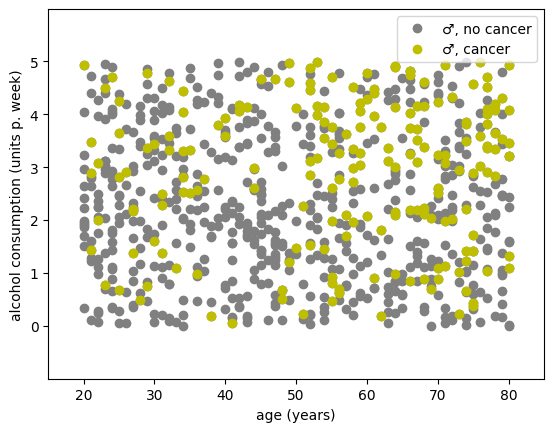

In [ ]:
# select the columns to be mapped on the x- and the y-axis of your coordinate system
# and convert their values to numpy arrays
df_m = df[df["Gender"] == 0]
df_mcanc = df_m[df_m["Diagnosis"] == 1]
x_1 = df_m["Age"].to_numpy()
y_1 = df_m["AlcoholIntake"].to_numpy()
x_2 = df_mcanc["Age"].to_numpy()
y_2 = df_mcanc["AlcoholIntake"].to_numpy()

# set the dimensions of the window to be displayed
xmin = min(x_1.min(), x_2.min()) - 5
xmax = max(x_1.max(), x_2.max()) + 5
ymin = min(y_1.min(), y_2.min()) - 1
ymax = max(y_1.max(), y_2.max()) + 1

# plot the graph (using Matplotlib)
fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax])
plt.plot(x_1, y_1, "o", color="grey", label="\u2642, no cancer")  # scatterplot: men without cancer diagnosis
plt.plot(x_2, y_2, "yo", label="\u2642, cancer")                  # scatterplot: men with cancer diagnosis
ax.set_xlabel("age (years)")
ax.set_ylabel("alcohol consumption (units p. week)")
plt.legend(loc="upper right")
plt.show()

**... a short comment on this graph:**  
Again two scatterplots that refer only to male participants this time and suggest a significant **correlation between the consumption of alcohol, increasing age and a diagnosis of cancer**.  
In total, 25.3% of men have been diagnosed with cancer in the sample. If we take into account the consumption of alcohol, however, the picture becomes more differentiated: Only 18.4% of those consuming less than three units of alcohol a week have a positive diagnosis, while this holds true for 37.1% of those consuming more than three, 38.7% of those cosuming more than four and 43.5% of those consuming nearly five units of alcohol. As far as the age factor is concerned, we can roughly state that the proportion of cancer patients under the age of 50 is only 15.2%, compared to circa 35% among men above the age of 50.  
If we look at the variables in their relation to each other, the following picture emerges: among men under the age of 50 only 12.3% of those, who consume less than three units of alcohol a week, have a cancer diagnosis, compared to 20.5% of those who consume more than three and 18.2% of those who consume nearly five units; among men over the age of 50, the percentages are 24.5% for those who consume less than three units, 52% for those who consume more than three and 66.7% for those consume nearly five units a week, respectively.  
So it turns out advanced age and regular alcohol consumption increase the risk of cancer both individually and especially in combination.

**(6)**

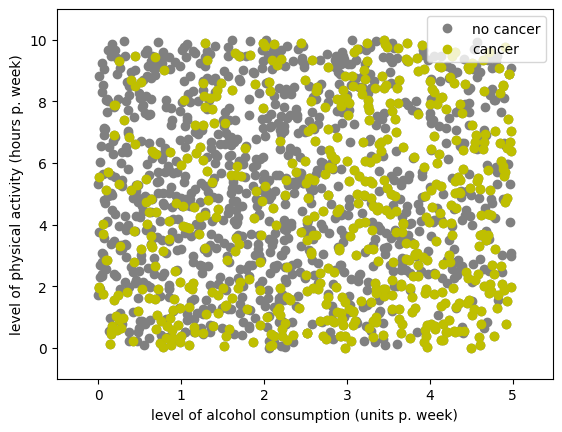

In [ ]:
# select the columns to be mapped on the x- and the y-axis of your coordinate system
# and convert their values to numpy arrays
df_canc = df[df["Diagnosis"] == 1]
x_1 = df["AlcoholIntake"].to_numpy()
y_1 = df["PhysicalActivity"].to_numpy()
x_2 = df_canc["AlcoholIntake"].to_numpy()
y_2 = df_canc["PhysicalActivity"].to_numpy()

# set the dimensions of the window to be displayed
xmin = min(x_1.min(), x_2.min()) - 0.5
xmax = max(x_1.max(), x_2.max()) + 0.5
ymin = min(y_1.min(), y_2.min()) - 1
ymax = max(y_1.max(), y_2.max()) + 1

# plot the graph (using Matplotlib)
fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax])
plt.plot(x_1, y_1, "o", color="grey", label="no cancer")  # scatterplot: persons without cancer diagnosis
plt.plot(x_2, y_2, "yo", label="cancer")                  # scatterplot: persons with cancer diagnosis
ax.set_xlabel("level of alcohol consumption (units p. week)")
ax.set_ylabel("level of physical activity (hours p. week)")
plt.legend(loc="upper right")
plt.show()

**... a short comment on this graph:**  
Two final scatterplots that illustrate **how (lack of) physical activity and the consumption of alcohol influence the risk of cancer**.  
Once again, these factors are highly relevant both on their own and in combination with each other.  
Looking first at *physical activity*, we see that "only" 31.8% of those spending more than six hours and 28.4% of those spending more than nine hours a week on physical activities are diagnosed with cancer, while this is true for 44.1% of those spending no more than four and even 58.6% of those spending no more than two hours on such activities.  
If we include *alcohol consumption*, the ratios are as follows: Among persons consuming less than three units of alcohol a week, "only" 22.4% of those spending more than six hours a week on physical activities have a diagnosis of cancer, compared to 37.6% of those spending no more than four and 51.7% of those spending no more than two hours on such activities. Among persons consuming more than three units of alcohol a week, the percentages are 46.9% for those spending over six hours, 55.9% for those spending no more than four hours and 71.3% for those spending no more than two hours on physical activities. If we increase the alcohol consumption to at least four units a week, the percentages are 45.5% for those spending over six hours, 62.5% for those spending no more than four hours and nearly 83% for those spending no more than two hours on physical activities.

**(7)**

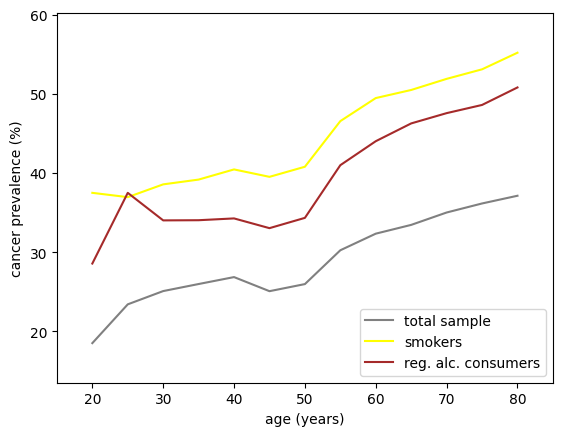

In [ ]:
# select the columns to be mapped on the x- and the y-axis of your coordinate system
# and convert their values to numpy arrays
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/The_Cancer_data_1500_V2.csv")
df_canc = df.loc[df["Diagnosis"] == 1]
df_smokers = df.loc[df["Smoking"] == 1]
df_canc_smokers = df_canc.loc[df_canc["Smoking"] == 1]
df_drinkers = df.loc[df["AlcoholIntake"] >= 3]
df_canc_drinkers = df_canc.loc[df_canc["AlcoholIntake"] >= 3]

canc_prev_total = list()
canc_prev_smokers = list()
canc_prev_drinkers = list()
age_steps = list()
limit = df["Age"].max()
age = 20
while age <= limit:
    a_1 = df_canc.loc[df_canc["Age"] <= age]["Diagnosis"].count()
    b_1 = df.loc[df["Age"] <= age]["Diagnosis"].count()
    q_1 = round((a_1/b_1)*100, 3)

    a_2 = df_canc_smokers.loc[df_canc_smokers["Age"] <= age]["Diagnosis"].count()
    b_2 = df_smokers.loc[df_smokers["Age"] <= age]["Diagnosis"].count()
    q_2 = round((a_2/b_2)*100, 3)

    a_3 = df_canc_drinkers.loc[df_canc_drinkers["Age"] <= age]["Diagnosis"].count()
    b_3 = df_drinkers.loc[df_drinkers["Age"] <= age]["Diagnosis"].count()
    q_3 = round((a_3/b_3)*100, 3)

    canc_prev_total.append(q_1)
    canc_prev_smokers.append(q_2)
    canc_prev_drinkers.append(q_3)
    age_steps.append(age)
    age += 5

x_vals = np.array(age_steps)
y_vals_1 = np.array(canc_prev_total)
y_vals_2 = np.array(canc_prev_smokers)
y_vals_3 = np.array(canc_prev_drinkers)

# set the dimensions of the window to be displayed
xmin = min(x_vals) - 5
xmax = max(x_vals) + 5
ymin = min(y_vals_1.min(), y_vals_2.min(), y_vals_3.min()) - 5
ymax = max(y_vals_1.max(), y_vals_2.max(), y_vals_3.max()) + 5

# plot the graph (using Matplotlib)
fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax])
plt.plot(x_vals, y_vals_1, "grey", label="total sample")
plt.plot(x_vals, y_vals_2, "yellow", label="smokers")
plt.plot(x_vals, y_vals_3, "brown", label="reg. alc. consumers")
ax.set_xlabel("age (years)")
ax.set_ylabel("cancer prevalence (%)")
plt.legend(loc="lower right")
plt.show()

**... a short comment on this graph:**  
We have three simple line graphs here that illustrate how **smoking** and the (regular) **consumption of alcohol** increase the risk of cancer, depending on age. For the sake of simplicity, I decided to qualify as "regular alcohol consumers" all persons of the sample taking three or more units of alcohol a week.  
Note: If we were to raise the level of weekly alcohol intake to four or nearly five units, the dark red line would clearly approach the yellow one and - due to the composition of the sample? - even go beyond it for the younger age groups. This shows that, although cigarette smoking ranks higher among the risk factors for cancer and is considered to be the most harmful to health, an increased level of alcohol consumption comes threateningly close to it.

**(8)**

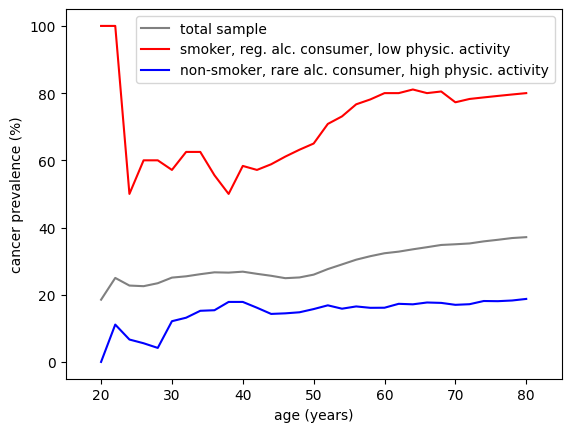

In [ ]:
# select the columns to be mapped on the x- and the y-axis of your coordinate system
# and convert their values to numpy arrays
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/The_Cancer_data_1500_V2.csv")
df_canc = df.loc[df["Diagnosis"] == 1]
df_smokeDrinkLowActivity = df.loc[(df["Smoking"] == 1) & (df["AlcoholIntake"] >= 3) & (df["PhysicalActivity"] <= 3)]
df_canc_smokeDrinkLowActivity = df_canc.loc[(df["Smoking"] == 1) & (df["AlcoholIntake"] >= 3) & (df["PhysicalActivity"] <= 3)]
df_noSmokeLittleDrinkHighActivity = df.loc[(df["Smoking"] == 0) & (df["AlcoholIntake"] < 3) & (df["PhysicalActivity"] >= 7)]
df_canc_noSmokeLittleDrinkHighActivity = df_canc.loc[(df["Smoking"] == 0) & (df["AlcoholIntake"] < 3) & (df["PhysicalActivity"] >= 7)]

canc_prev_total = list()
canc_prev_smokeDrinkLowActivity = list()
canc_prev_noSmokeLittleDrinkHighActivity = list()
age_steps = list()
limit = df["Age"].max()
age = 20
while age <= limit:
    a_1 = df_canc.loc[df_canc["Age"] <= age]["Diagnosis"].count()
    b_1 = df.loc[df["Age"] <= age]["Diagnosis"].count()
    q_1 = round((a_1/b_1)*100, 3)

    a_2 = df_canc_smokeDrinkLowActivity.loc[df_canc_smokeDrinkLowActivity["Age"] <= age]["Diagnosis"].count()
    b_2 = df_smokeDrinkLowActivity.loc[df_smokeDrinkLowActivity["Age"] <= age]["Diagnosis"].count()
    q_2 = round((a_2/b_2)*100, 3)

    a_3 = df_canc_noSmokeLittleDrinkHighActivity.loc[df_canc_noSmokeLittleDrinkHighActivity["Age"] <= age]["Diagnosis"].count()
    b_3 = df_noSmokeLittleDrinkHighActivity.loc[df_noSmokeLittleDrinkHighActivity["Age"] <= age]["Diagnosis"].count()
    q_3 = round((a_3/b_3)*100, 3)

    canc_prev_total.append(q_1)
    canc_prev_smokeDrinkLowActivity.append(q_2)
    canc_prev_noSmokeLittleDrinkHighActivity.append(q_3)
    age_steps.append(age)
    age += 2

x_vals = np.array(age_steps)
y_vals_1 = np.array(canc_prev_total)
y_vals_2 = np.array(canc_prev_smokeDrinkLowActivity)
y_vals_3 = np.array(canc_prev_noSmokeLittleDrinkHighActivity)

# set the dimensions of the window to be displayed
xmin = min(x_vals) - 5
xmax = max(x_vals) + 5
ymin = min(y_vals_1.min(), y_vals_2.min(), y_vals_3.min()) - 5
ymax = max(y_vals_1.max(), y_vals_2.max(), y_vals_3.max()) + 5

# plot the graph (using Matplotlib)
fig, ax = plt.subplots()
plt.axis([xmin,xmax,ymin,ymax])
plt.plot(x_vals, y_vals_1, "grey", label="total sample")
plt.plot(x_vals, y_vals_2, "red", label="smoker, reg. alc. consumer, low physic. activity")
plt.plot(x_vals, y_vals_3, "blue", label="non-smoker, rare alc. consumer, high physic. activity")
ax.set_xlabel("age (years)")
ax.set_ylabel("cancer prevalence (%)")
plt.legend(loc="upper right")
plt.show()

**... a short comment on this graph:**  
Once again three line graphs that are designed this time to illustrate how **smoking**, the **consumption of alcohol** and **(lack of) physical activity** influence the prevalence of cancer, depending on age. I defined persons of the sample consuming three or more units of alcohol a week as "regular alcohol consumers", persons consuming less than three units by contrast as "rare alcohol consumers". The indication "low physical activity" refers to persons spending no more than three hours, the indication "high physical activity" to persons spending at least seven hours a week on physical activities.  
Note: The striking peak value of the red line, that represents the youngest age group of the sample, is most likely a random result of the sample composition. (There are not too many smokers and alcohol consumers with a low level of physical activity among the twenty-plus year olds (two persons, based on our definitions!), and all of these were diagnosed with cancer.)

# **Appendix**

As a small bonus, I demonstrate a simple way to plot pairwise relationships between the variables of the chosen dataset. To this end I make use of the library `Seaborn` again that allows for an easy-to-implement and visually convincing solution.  
For the use of `Seaborn`'s function `pairplot()` I refer the interested reader to the library's documentation (s. https://seaborn.pydata.org/generated/seaborn.pairplot.html).  
(Note: I owe the idea and the reference to this function to Akash Prajapatids, who has also applied it to the dataset presented here: s. https://www.kaggle.com/code/akashprajapatids/cancer-prediction.)


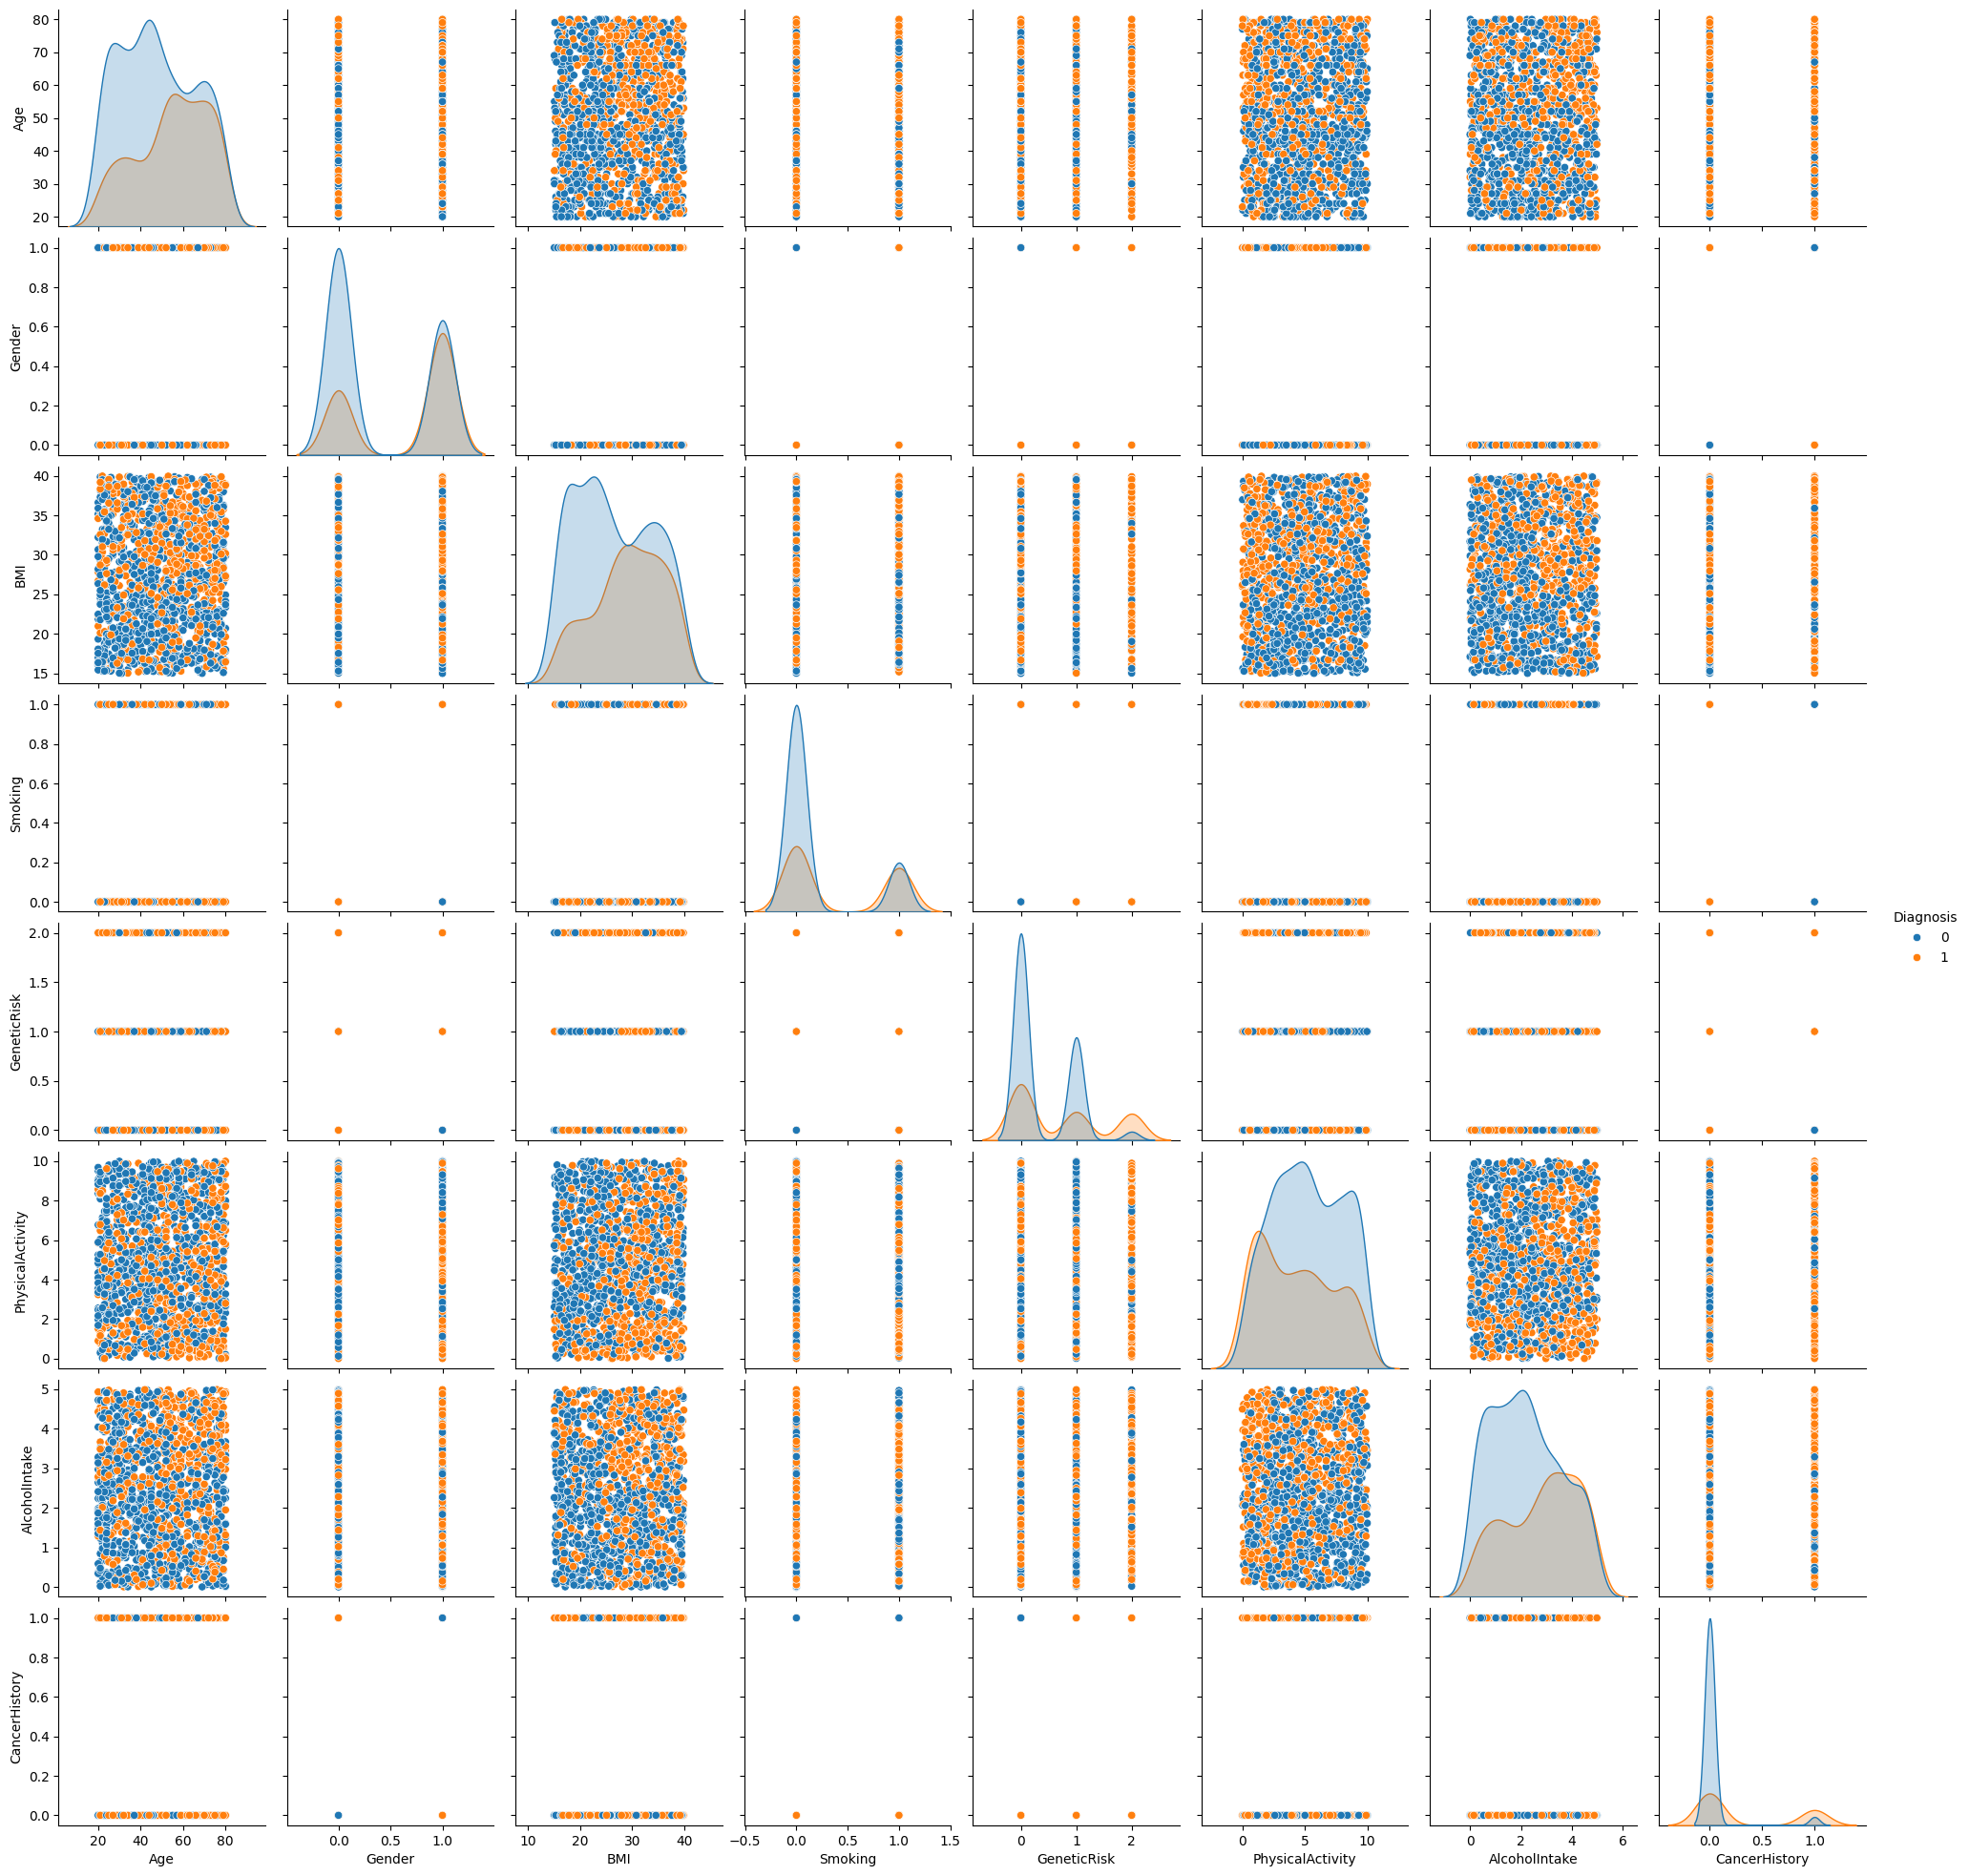

In [ ]:
import seaborn as sns

sns.pairplot(df, hue='Diagnosis')